# Part I 

[Gas sensors for home activity monitoring Data Set](https://archive.ics.uci.edu/ml/datasets/Gas+sensors+for+home+activity+monitoring)


[KNN](https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/supervised_learning/k_nearest_neighbors.py)

[ML-From-Scratch Logistic Regression](https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/supervised_learning/logistic_regression.py)

[Numpy LR](https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f)

## Preprocessing

In [1]:
import numpy as np

In [380]:
metadata=np.loadtxt("./data/HT_Sensor_UCIsubmission/HT_Sensor_metadata.dat",skiprows=1,dtype=str)

In [3]:
metadata[metadata[:,2]=="background",2]=2
metadata[metadata[:,2]=="banana",2]=0
metadata[metadata[:,2]=="wine",2]=1

metadata=np.array(metadata[:,[0,2,3,4]],dtype=float)

In [4]:
dataset = np.loadtxt('./data/HT_Sensor_UCIsubmission/HT_Sensor_dataset.dat', skiprows=1)
datasetID=np.array(dataset[:,0],dtype=int)

In [5]:
# 仅仅挑选ID为banana与wine的
# 以及时间恰好有这两者存在的时间区间
selected = np.logical_and(metadata[datasetID,1]!=2,dataset[:,1]>0,dataset[:,1]<metadata[datasetID,3])
data=dataset[selected]
dataID=np.array(data[:,0],dtype=int)
data[:,0]=metadata[dataID,1]

#混淆in-place
np.random.shuffle(data)
#归一化
dataID=np.array(data[:,0],dtype=int)
data=(data-data.mean(axis=0))/data.std(axis=0)
data[:,0]=dataID
np.save("./data/HT_Sensor_UCIsubmission/data.npy",data)

## KNN

In [6]:
import numpy as np
from collections import Counter

In [207]:
data=np.load("./data/HT_Sensor_UCIsubmission/data.npy")
test_size=data.shape[0]//2
#分割train test 10%
X_test=data[:test_size,2:10]
y_test=data[:test_size,0].astype('int')

X_train=data[test_size:,2:10]
y_train=data[test_size:,0].astype('int')

print(X_test.shape,y_test.shape,X_train.shape,y_train.shape,data.shape)

(208227, 8) (208227,) (208228, 8) (208228,) (416455, 12)


In [151]:
class KNN():
    def __init__(self, k=5):
        self.k = k

    def predict(self, X_test, X_train, y_train):
        y_pred=np.empty(X_test.shape[0],dtype=int)
        for i,X in enumerate(X_test):
            if i%100 ==0:
                print(i)
            y_pred[i]=np.bincount(y_train[np.argsort(np.linalg.norm(X-X_train,axis=1))[:self.k]]).argmax()
        return y_pred

In [152]:
model=KNN(1)
y_pred=model.predict(X_test[:],X_train[:],y_train)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [155]:
result=Counter(np.equal(y_pred[:],y_test[:])).most_common()
result

[(True, 41638), (False, 7)]

```python
result=Counter(np.equal(y_pred[:],y_test[:])).most_common()
result
```
```python
[(True, 41638), (False, 7)]
```

## Logistic Regression

In [12]:
import numpy as np
from collections import Counter
import math

In [211]:
data=np.load("./data/HT_Sensor_UCIsubmission/data.npy")
test_size=data.shape[0]//10
#分割train test 10%
X_test=data[:test_size,2:10]
y_test=data[:test_size,0].astype('int')

X_train=data[test_size:,2:10]
y_train=data[test_size:,0].astype('int')

print(X_test.shape,y_test.shape,X_train.shape,y_train.shape,data.shape)

(41645, 8) (41645,) (374810, 8) (374810,) (416455, 12)


In [14]:
class LogisticRegression():
    def __init__(self,lr=0.1):
        self.lr=lr
        
    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))
    
    def loss(self,y,y_hat):
        return -np.mean(y * np.log(y_hat)+(1-y)*np.log(1-y_hat))
    
    def fit(self,X_train,y_train,epochs=5000):
        limit=1/math.sqrt(X_train.shape[1])
        self.W=np.random.uniform(-limit,limit,(X_train.shape[1],))
        
        for i in range(epochs):
            y_hat=self.sigmoid(X_train @ self.W)
            self.W -= self.lr * (X_train.T @ (y_hat - y_train) / y_train.shape[0])
            if i %100 ==0:
                print(i,self.loss(y_train,y_hat))
                
    def predict(self,X_test):
        y_pred=self.sigmoid(X_test @ self.W)>0.5
        return y_pred.astype('int')

In [16]:
model=LogisticRegression(0.25)
model.fit(X_train,y_train,1000)
y_pred=model.predict(X_test)

0 0.7004350378700732
100 0.5706072688931285
200 0.5691493780285929
300 0.5688116870791486
400 0.5686288767545028
500 0.5685047730350296
600 0.5684162337831324
700 0.568352323568467
800 0.5683060340139551
900 0.5682724636461016


In [17]:
Counter(y_pred == y_test).most_common()

[(True, 28817), (False, 12828)]

# Part II-1

In [21]:
import numpy as np

In [22]:
ratings=np.loadtxt("./data/ml-1m/ratings.dat",delimiter="::",dtype=int)

In [83]:
user_num=6040
movie_num=3952
rating_matrix=np.zeros((6040+1,3952+1))
for r in ratings:
    rating_matrix[r[0],r[1]]=r[2] #rating_matrix[userID,movieID]

In [212]:
# 分割为train & test
train_matrix=rating_matrix.copy()
test_user_size=rating_matrix.shape[0]//10
test_movie_size=rating_matrix.shape[1]//10

train_matrix[:test_user_size,:test_movie_size]=0

test_matrix=rating_matrix[:test_user_size,:test_movie_size].copy()

print(train_matrix.shape,test_matrix.shape,rating_matrix.shape)

(6041, 3953) (604, 395) (6041, 3953)


## Content-Based

In [116]:
user_profile=np.zeros((test_user_size,user_num+1))
for i in range(test_user_size):
    user_profile[i]=np.sum(train_matrix*train_matrix[i],axis=1)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [135]:
cb_pred=np.zeros((test_user_size,test_movie_size))
for i in range(1,test_user_size):
    for j in range(1,test_movie_size):
        norm=np.linalg.norm(train_matrix[:,j])*np.linalg.norm(user_profile[i])
        if norm == 0:
            cb_pred[i,j]=0
        else:
            cb_pred[i,j]=((train_matrix[:,j]@user_profile[i])/(norm))*5

In [168]:
result_matrix=np.zeros((test_user_size,test_movie_size))
for i in range(test_user_size):
    for j in range(test_movie_size):
        if test_matrix[i,j]!=0:
            result_matrix[i,j]=cb_pred[i,j]-test_matrix[i,j]

$$
RMSE=\sqrt{\frac{1}{n}\sum_{j=1}^n (y_j-\bar{y}_j)^2}
$$

In [174]:
#RMSE
np.linalg.norm(result_matrix)/np.count_nonzero(test_matrix)

0.016676901400536383

$$
MAE=\frac{1}{n}\sum_{j=1}^n|y_j-\bar{y}_j|
$$

In [175]:
#MAE
np.sum(np.absolute(result_matrix))/np.count_nonzero(test_matrix)

1.4344089529739494

## Collaborative Filtering

In [321]:
print(train_matrix.shape,test_matrix.shape,rating_matrix.shape)

(6041, 3953) (604, 395) (6041, 3953)


In [322]:
#item相似性 movie[i,j]表示电影i,j的相似性
movie_sim=np.zeros((movie_num+1,movie_num+1))
movie_bar=np.zeros(movie_num+1)
for i in range(movie_num+1):
    ri=train_matrix[:,i]
    nonzero=np.count_nonzero(ri)
    if nonzero!=0:
        movie_bar[i]=ri.sum()/nonzero


for i in range(1,movie_num+1):
    print(i)
    for j in range(1,movie_num+1):
        if i>j:
            movie_sim[i,j]=movie_sim[j,i]
            continue
        ri=train_matrix[:,i]
        rj=train_matrix[:,j]
        
        rri=np.zeros(user_num+1)
        rrj=np.zeros(user_num+1)
        selected=np.logical_and(ri,rj)
        rri[selected]=ri[selected]-movie_bar[i]
        rrj[selected]=rj[selected]-movie_bar[j]
        
        norm=np.linalg.norm(rri)*np.linalg.norm(rrj)
        if norm==0:
            movie_sim[i,j]=0
        else:
            movie_sim[i,j]=(rri@rrj)/(norm)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700


In [329]:
np.save("./data/ml-1m/movie_sim.npy",movie_sim)
#s=np.load("./data/ml-1m/movie_sim.npy")

In [323]:
user_bar=np.zeros(user_num+1)
for i in range(user_num+1):
    ri=train_matrix[i]
    nonzero=np.count_nonzero(ri)
    if nonzero!=0:
        user_bar[i]=ri.sum()/nonzero

In [324]:
miu=train_matrix.sum()/np.count_nonzero(train_matrix)
bxi=user_bar.reshape(user_num+1,1)+movie_bar-miu

In [327]:
k=5
cf_pred=np.zeros((test_user_size,test_movie_size))

for x in range(1,test_user_size):
    print(x)
    for i in range(1,test_movie_size):
        index=np.arange(movie_num+1)[train_matrix[x].astype("bool")]
        Nix=index[np.argsort(movie_sim[i,train_matrix[x].astype("bool")])[-k:]]
        
        sumij=movie_sim[i,Nix].sum()
        if sumij!=0:
            cf_pred[x,i]=bxi[x,i]+(movie_sim[i,Nix]@(train_matrix[x,Nix]-bxi[x,Nix]))/sumij

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [332]:
result_matrix=np.zeros((test_user_size,test_movie_size))
for i in range(test_user_size):
    for j in range(test_movie_size):
        if test_matrix[i,j]!=0:
            result_matrix[i,j]=cf_pred[i,j]-test_matrix[i,j]

In [333]:
#RMSE
np.linalg.norm(result_matrix)/np.count_nonzero(test_matrix)

0.00955229861232987

In [334]:
#MAE
np.sum(np.absolute(result_matrix))/np.count_nonzero(test_matrix)

0.7564046977909593

## Extension

基于Collaborative Filter

In [451]:
print(train_matrix.shape,test_matrix.shape,rating_matrix.shape)

(6041, 3953) (604, 395) (6041, 3953)


In [432]:
movies=np.zeros((movie_num+1,3),dtype="<100U")
with open("./data/ml-1m/movies.dat",encoding = "ISO-8859-1") as f:
    line=f.readline()
    while line:
        temp=line.strip().split("::")
        movies[int(temp[0]),:]=temp
        line=f.readline()

array(['1000', 'Curdled (1996)', 'Crime'], dtype='<U100')

In [423]:
users=np.zeros((user_num+1,5),dtype="<20U")
with open("./data/ml-1m/users.dat",encoding = "ISO-8859-1") as f:
    line=f.readline()
    while line:
        temp=line.strip().split("::")
        users[int(temp[0]),:]=temp
        line=f.readline()

In [449]:
genre={"Action":0,
"Adventure":1,
"Animation":2,
"Children's":3,
"Comedy":4,
"Crime":5,
"Documentary":6,
"Drama":7,
"Fantasy":8,
"Film-Noir":9,
"Horror":10,
"Musical":11,
"Mystery":12,
"Romance":13,
"Sci-Fi":14,
"Thriller":15,
"War":16,
"Western":17
      }

movie_profile=np.zeros((movie_num+1,18))
for i in range(movie_num+1):
    temp=movies[i,2].split('|')
    for g in temp:
        if g in genre:
            movie_profile[i,genre[g]]=1

In [460]:
user_profile=np.zeros((test_user_size,18))
for i in range(test_user_size):
    user_profile[i]=np.sum(movie_profile.T*train_matrix[i],axis=1)

In [481]:
#逐渐变化alpha得到一个图
ex_pred=np.zeros((test_user_size,test_movie_size))
alpha=0.01
for x in range(1,test_user_size):
    if x%100 == 0:
        print(x)
    for i in range(1,test_movie_size):
        norm=np.linalg.norm(movie_profile[i])*np.linalg.norm(user_profile[x])
        if norm != 0:
            ex_pred[x,i]=0
            index=np.arange(movie_num+1)[train_matrix[x].astype("bool")]
            Nix=index[np.argsort(movie_sim[i,train_matrix[x].astype("bool")])[-k:]]
        
            sumij=movie_sim[i,Nix].sum()
            
            if sumij!=0:
                ex_pred[x,i]=bxi[x,i]+(1-alpha)*(movie_sim[i,Nix]@(train_matrix[x,Nix]-bxi[x,Nix]))/sumij+alpha*((movie_profile[i]@user_profile[x])/(norm))*5

100
200
300
400
500
600


In [482]:
result_matrix=np.zeros((test_user_size,test_movie_size))
for i in range(test_user_size):
    for j in range(test_movie_size):
        if test_matrix[i,j]!=0:
            result_matrix[i,j]=ex_pred[i,j]-test_matrix[i,j]

In [483]:
#RMSE;0.00955229861232987
np.linalg.norm(result_matrix)/np.count_nonzero(test_matrix) 

0.009544838568277359

In [484]:
#MAE;0.7564046977909593
np.sum(np.absolute(result_matrix))/np.count_nonzero(test_matrix)

0.7547069141050321

# Part II-2

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

## Graph Visualization

[networkx](https://networkx.github.io/documentation/stable/tutorial.html)

[networkx 笔记](https://hui-liu.github.io/blog/networkx-%E7%AC%94%E8%AE%B0/)

In [20]:
f=open("./data/graph/Erdos1_modified")
line=f.readlines()

In [21]:
data=[]
temp=[]
count=0
for i in line:
    if i!='\n':
        s=i.strip("\t\n 1234567890*^:").lower()
        if s=="erdos, peter l.":
            count+=1
        else:
            temp.append(s)
    else:
        data.append(temp)
        temp=[]
data.append(temp)
print(count)

10


In [22]:
name2seq=dict()
count=0
max_co=0
for i in data:
    if len(i)>max_co:
        max_co=len(i)
    for j in i:
        if not j in name2seq:
            name2seq[j]=count
            count+=1
name_num=len(name2seq)
print(name_num,max_co)

11517 435


In [23]:
seq2name={}
for i in name2seq.items():
    seq2name[i[1]]=i[0]

In [24]:
graph=np.full((name_num,name_num),False)
for i in data:
    x=name2seq[i[0]]
    for j in i[1:]:
        y=name2seq[j]
        graph[x,y]=True
        graph[y,x]=True

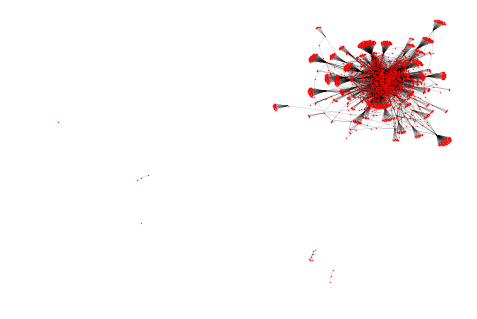

In [16]:
G=nx.Graph(graph[:3000,:3000])
%matplotlib inline
options = {
    'node_color': 'red',
    'node_size': 0.15,
    'line_color': 'grey',
    #'linewidths': 0,
    'width': 0.1,
}
nx.draw(G,**options)
#plt.figure(figsize=(30,70))
plt.savefig("node3000.png",dpi=1000)
plt.show()

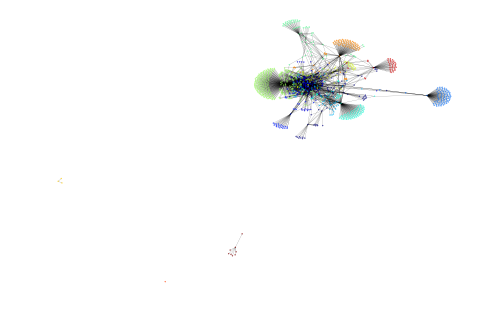

In [63]:
#!pip install python-louvain 
#思考是否可用动态的/ice and fire/knowledge graph
from community import community_louvain
G=nx.Graph(graph[:1000,:1000])
part =community_louvain.best_partition(G)
values = [part.get(node) for node in G.nodes()]

options = {
    'node_color': 'red',
    'node_size': 0.1,
    'line_color': 'grey',
    #'linewidths': 0,
    'width': 0.1,
    'cmap':plt.get_cmap('jet'),
    'node_color':values
}
nx.draw(G,**options)
#plt.figure(figsize=(30,70))
plt.savefig("./graph/node1000best_partition.png",dpi=1000)
plt.show()

## Influence

### Degree Centrality

In [7]:
degree=graph.sum(axis=0)
seq2name[degree.argmax()]

'alon, noga m.'

### Eigenvector Centrality

In [23]:
#w,v=np.linalg.eig(graph)
w2,v2=np.linalg.eigh(graph.astype("float"))

np.save("./data/graph/w2.npy",w2)
np.save("./data/graph/v2.npy",v2)

In [37]:
w2=np.load("./data/graph/w2.npy")
v2=np.load("./data/graph/v2.npy")
seq2name[v2[:,w2.argmax()].argmax()]

'alon, noga m.'

### Closeness Centrality

In [48]:
#近似算法，计算距离
#下面的D可以从内存取出，迭代
D=np.full((name_num,name_num),name_num)
D[graph]=1
index=np.arange(name_num)
for k in range(2):
    print("====== ",k," ======")
    for i in range(n):
        if i%1000==0:
            print(i)
        nextP=index[D[i]!=name_num]
        for j in range(n):
            for p in nextP:
                D[i,j]=min(D[i,j],D[i,p]+D[p,j])
np.save("./data/graph/D.npy",D)

======  0  ======
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
======  1  ======
0


KeyboardInterrupt: 

In [50]:
np.save("./data/graph/D.npy",D)

In [51]:
Distance=np.load("./data/graph/D.npy")
D_avg=(name_num-1)/(Distance.sum(axis=1))

In [52]:
seq2name[D_avg.argmax()]

'alon, noga m.'

## Community

[KMeans](https://gist.github.com/bistaumanga/6023692)

[KMeans Reinforce](https://gist.github.com/tvwerkhoven/4fdc9baad760240741a09292901d3abd)

In [4]:
import numpy as np

def kMeans(X, K, maxIters = 10, plot_progress = None):
    
    centroids = X[np.random.choice(np.arange(len(X)), K)]
    for i in range(maxIters):
        if i%100==0:
            print("Iter: ",i)
        # Cluster Assignment step
        C = np.array([np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in centroids]) for x_i in X])
        # Ensure we have K clusters, otherwise reset centroids and start over
        # If there are fewer than K clusters, outcome will be nan.
        if (len(np.unique(C)) < K):
            print("Reset")
            centroids = X[np.random.choice(np.arange(len(X)), K)]
        else:
            # Move centroids step 
            centroids = [X[C == k].mean(axis = 0) for k in range(K)]
        if plot_progress != None: plot_progress(X, C, np.array(centroids))
    return np.array(centroids) , C

In [10]:
D1=graph.sum(axis=0).astype("float")
D1[D1==0]=0.1
D=np.diag(D1)
W=graph.copy().astype("float")

### Ratio Cut

$D-W$选择最小的k个特征向量$n\times k$ 

In [11]:
w_r,v_r=np.linalg.eigh(D-W)
np.save("./data/graph/w_r.npy",w_r)
np.save("./data/graph/v_r.npy",v_r)

In [11]:
w_r=np.load("./data/graph/w_r.npy")
v_r=np.load("./data/graph/v_r.npy")

In [ ]:
K=10 #K Clusters
k=100 #n*k
Miter=1000
centroids_r,C_r=kMeans(v_r[:,np.argsort(w_r)[:k]], K, maxIters = Miter, plot_progress = None)

Iter:  0
Iter:  100
Iter:  200
Iter:  300
Iter:  400
Iter:  500
Iter:  600
Iter:  700
Iter:  800
Iter:  900


In [ ]:
Counter(C_r).most_common()

### Normalized Cut

$D^{-\frac{1}{2}}(D-W)D^{-\frac{1}{2}}$选择最小的k个特征向量$n\times k$

In [13]:
w_n,v_n=np.linalg.eigh((np.diag(D1**(-1/2)))@(D-W)@(np.diag(D1**(-1/2))))
np.save("./data/graph/w_n.npy",w_n)
np.save("./data/graph/v_n.npy",v_n)

In [2]:
w_n=np.load("./data/graph/w_n.npy")
v_n=np.load("./data/graph/v_n.npy")

In [5]:
K=5 #K Clusters
k=100 #n*k
Miter=1000
centroids_n,C_n=kMeans(v_n[:,np.argsort(w_n)[:k]], K, maxIters = Miter, plot_progress = None)

Iter:  0
Iter:  100
Iter:  200
Iter:  300
Iter:  400
Iter:  500
Iter:  600
Iter:  700
Iter:  800
Iter:  900


In [6]:
Counter(C_n).most_common()

[(2, 10747), (4, 424), (1, 212), (0, 107), (3, 27)]

### Modularity

$B=A-dd^\top /2m$ 选择最大的k个特征向量$n\times k$

In [15]:
w_m,v_m=np.linalg.eigh(W-D1.reshape(name_num,1)@D1.reshape(1,name_num)/W.sum())
np.save("./data/graph/w_m.npy",w_m)
np.save("./data/graph/v_m.npy",v_m)

In [7]:
w_m=np.load("./data/graph/w_m.npy")
v_m=np.load("./data/graph/v_m.npy")

In [8]:
K=5 #K Clusters
k=100 #n*k
Miter=1000
centroids_m,C_m=kMeans(v_m[:,np.argsort(w_m)[-k:]], K, maxIters = Miter, plot_progress = None)

Iter:  0
Iter:  100
Iter:  200
Iter:  300
Iter:  400
Iter:  500
Iter:  600
Iter:  700
Iter:  800
Iter:  900


In [9]:
Counter(C_m).most_common()

[(4, 10749), (2, 413), (0, 237), (3, 105), (1, 13)]